# 1.2 What's Happening? Plotting Data

The simplest way to present a dataset is with a table, but tables become unwieldy for large datasets. **Visualization** is key to understanding data - plots reveal patterns, outliers, and structure that tables obscure.

This section introduces fundamental plotting techniques for one-dimensional (1D) data:
- **Bar charts** for categorical data
- **Histograms** for continuous data
- **Conditional histograms** for comparing groups

## 1.2.1 Bar Charts

A **bar chart** displays categorical data with bars whose heights represent the frequency of each category.

### Definition

For categorical data with $k$ categories, a bar chart consists of:
- $k$ bars, one per category
- Height of each bar = count (or proportion) of items in that category
- Bars are typically separated by gaps

### When to Use Bar Charts

Bar charts are ideal for:
- **Categorical variables** (gender, goals, preferences)
- **Small number of categories** (typically < 20)
- **Comparing frequencies** across categories
- **Non-ordinal data** (though can be used for ordinal too)

### Example 1: Gender Distribution

The Chase and Danner study recorded gender for 478 students:
- **Boys**: 240 students (50.2%)
- **Girls**: 238 students (49.8%)

The bar chart immediately shows roughly equal gender distribution:

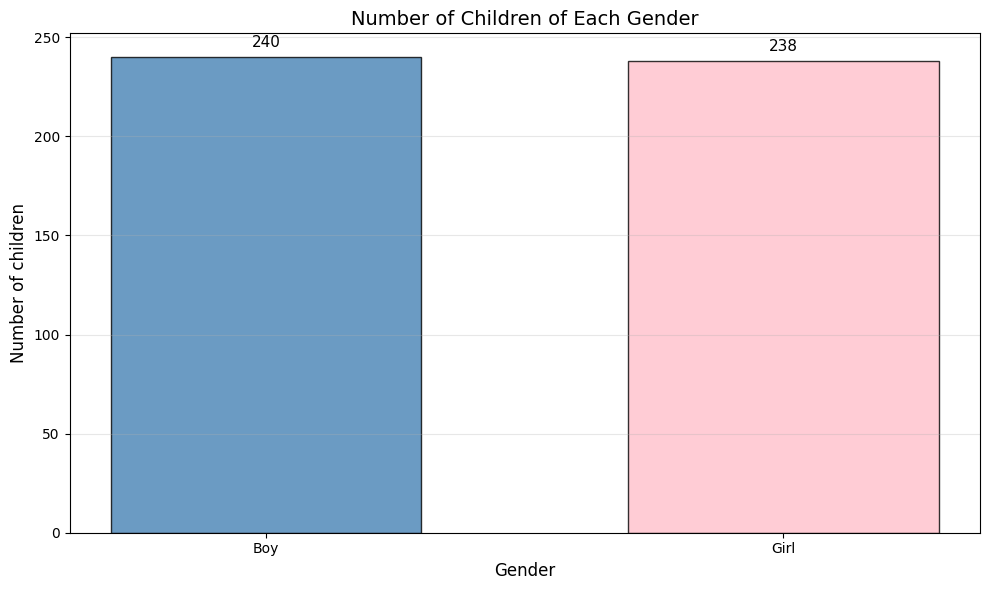

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
genders = ['Boy', 'Girl']
counts = [240, 238]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(genders, counts, color=['steelblue', 'pink'], 
        alpha=0.8, edgecolor='black', width=0.6)
plt.ylabel('Number of children', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title('Number of Children of Each Gender', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (gender, count) in enumerate(zip(genders, counts)):
    plt.text(i, count + 5, str(count), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

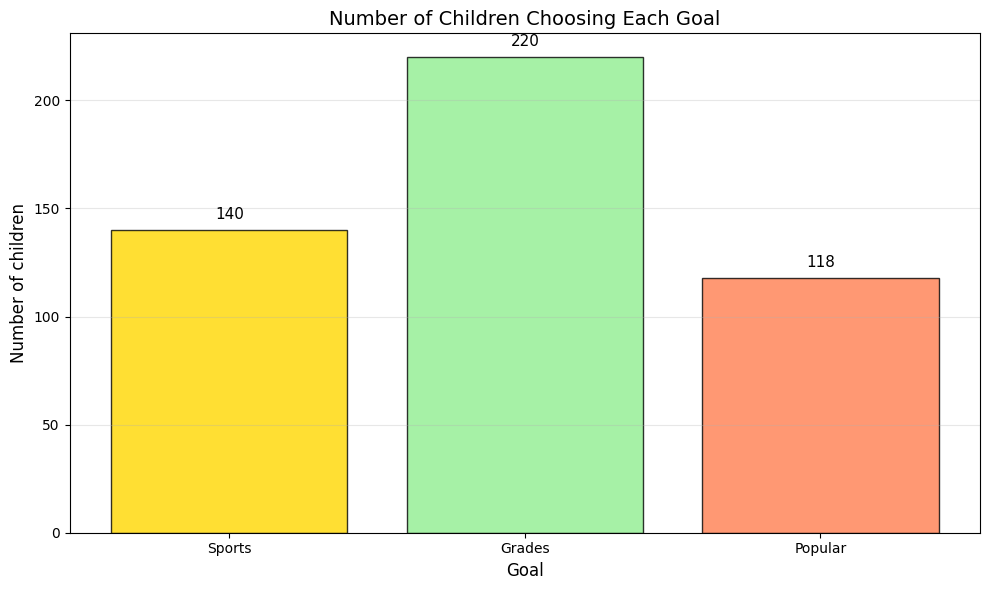

In [2]:
goals = ['Sports', 'Grades', 'Popular']
goal_counts = [140, 220, 118]

plt.figure(figsize=(10, 6))
colors = ['gold', 'lightgreen', 'coral']
plt.bar(goals, goal_counts, color=colors, alpha=0.8, edgecolor='black')
plt.ylabel('Number of children', fontsize=12)
plt.xlabel('Goal', fontsize=12)
plt.title('Number of Children Choosing Each Goal', fontsize=14)
plt.grid(axis='y', alpha=0.3)

for i, count in enumerate(goal_counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

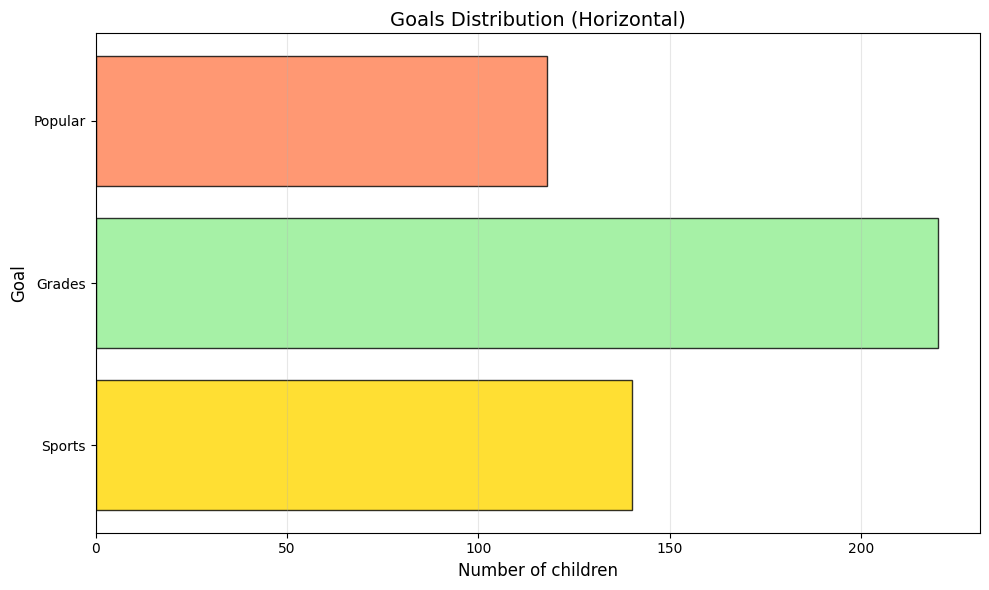

In [3]:
# Horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(goals, goal_counts, color=colors, alpha=0.8, edgecolor='black')
plt.xlabel('Number of children', fontsize=12)
plt.ylabel('Goal', fontsize=12)
plt.title('Goals Distribution (Horizontal)', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

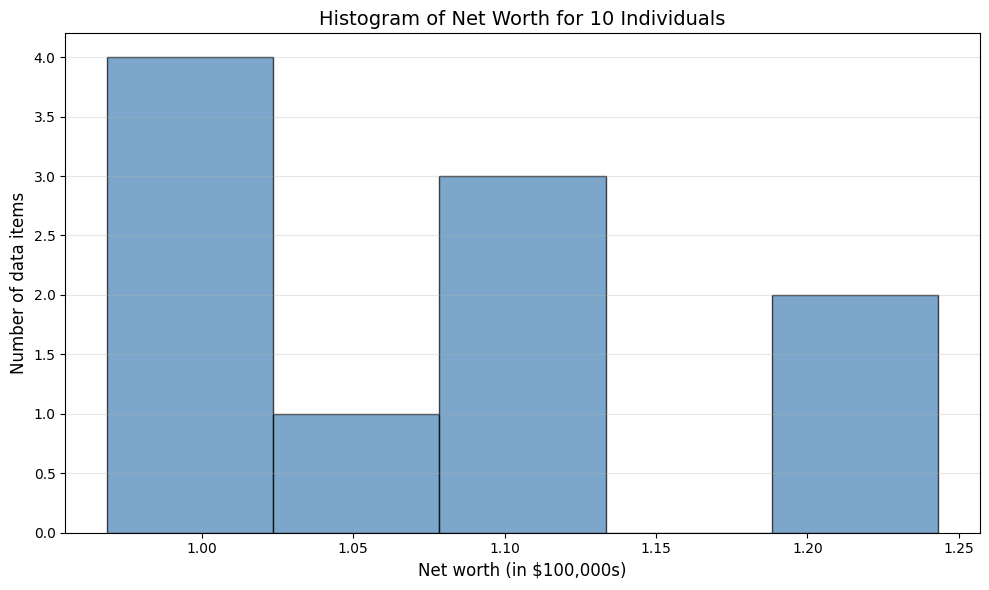

In [4]:
net_worth = np.array([100360, 109770, 96860, 97860, 108930, 
                      124330, 101300, 112710, 106740, 120170])

# Convert to $100,000s for easier reading
net_worth_100k = net_worth / 100000

plt.figure(figsize=(10, 6))
plt.hist(net_worth_100k, bins=5, edgecolor='black', 
         alpha=0.7, color='steelblue')
plt.xlabel('Net worth (in $100,000s)', fontsize=12)
plt.ylabel('Number of data items', fontsize=12)
plt.title('Histogram of Net Worth for 10 Individuals', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

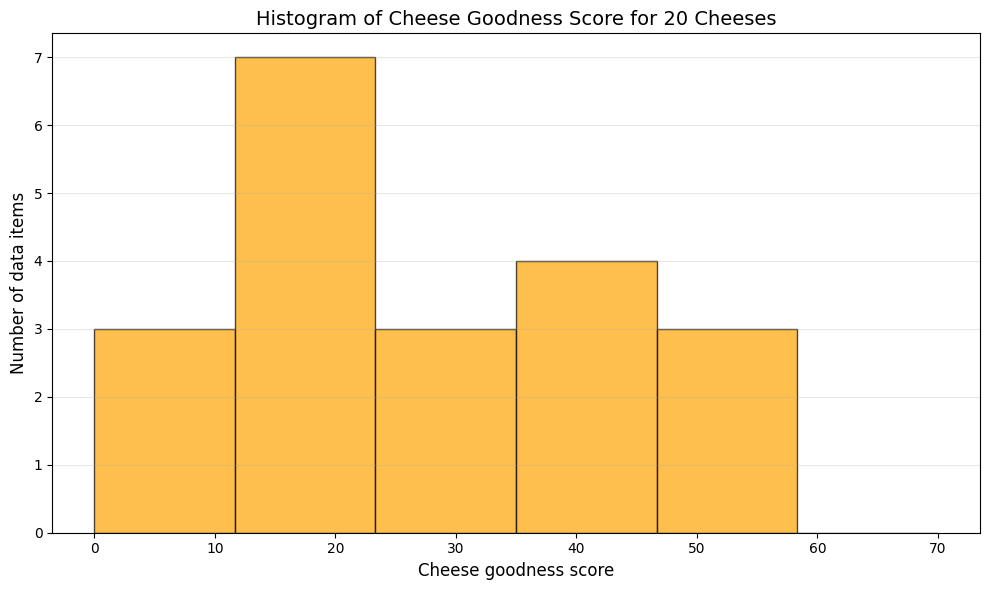

In [5]:
cheese_scores = np.array([12.3, 20.9, 39, 47.9, 5.6, 25.9, 37.3, 
                          21.9, 18.1, 21, 34.9, 57.2, 0.7, 25.9, 
                          54.9, 40.9, 15.9, 6.4, 18, 38.9])

plt.figure(figsize=(10, 6))
plt.hist(cheese_scores, bins=6, range=(0, 70), 
         edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Cheese goodness score', fontsize=12)
plt.ylabel('Number of data items', fontsize=12)
plt.title('Histogram of Cheese Goodness Score for 20 Cheeses', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Bin Centers: [ 5.40833333 14.825      24.24166667 33.65833333 43.075      52.49166667]
Counts: [3 4 5 2 3 3]
Bin Width: 9.42


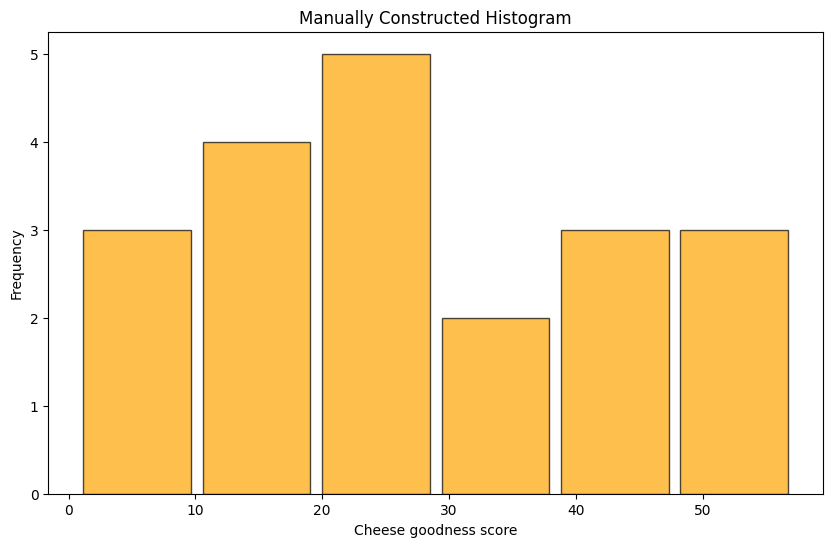

In [6]:
# Manual histogram calculation
def make_histogram(data, n_bins):
    x_min, x_max = data.min(), data.max()
    bin_width = (x_max - x_min) / n_bins
    
    # Create bin edges
    bin_edges = np.linspace(x_min, x_max, n_bins + 1)
    
    # Count items in each bin
    counts, _ = np.histogram(data, bins=bin_edges)
    
    # Bin centers for plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    return bin_centers, counts, bin_width

# Example
bin_centers, counts, bin_width = make_histogram(cheese_scores, 6)

print(f"Bin Centers: {bin_centers}")
print(f"Counts: {counts}")
print(f"Bin Width: {bin_width:.2f}")

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=bin_width*0.9, 
        edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Cheese goodness score')
plt.ylabel('Frequency')
plt.title('Manually Constructed Histogram')
plt.show()

Custom bin edges: [0, 10, 20, 35, 50, 70]
Counts: [3 4 6 5 2]
Bin widths: [10 10 15 15 20]
Densities (height): [0.3        0.4        0.4        0.33333333 0.1       ]


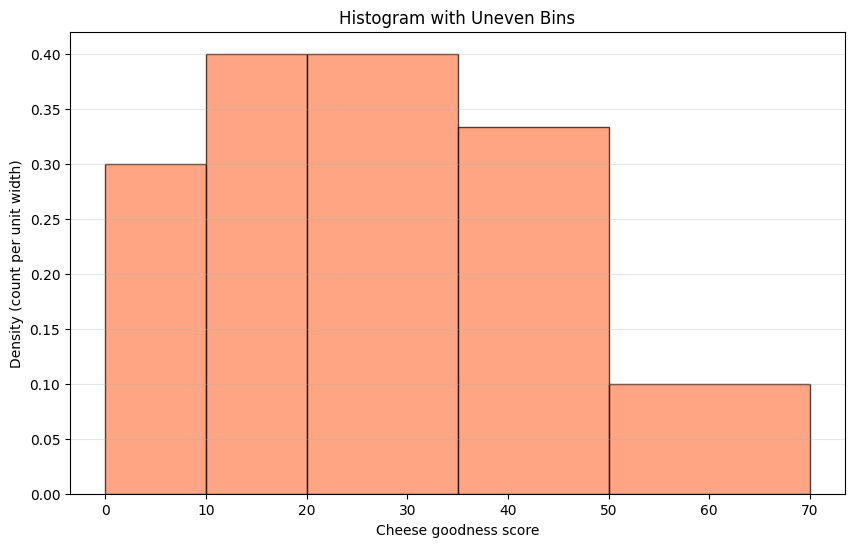

In [7]:
# Custom bin edges (uneven)
custom_bins = [0, 10, 20, 35, 50, 70]
counts_custom, bin_edges = np.histogram(cheese_scores, bins=custom_bins)

# Calculate widths and densities
bin_widths = np.diff(bin_edges)
densities = counts_custom / bin_widths  # Height proportional to density

print(f"Custom bin edges: {custom_bins}")
print(f"Counts: {counts_custom}")
print(f"Bin widths: {bin_widths}")
print(f"Densities (height): {densities}")

plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], densities, width=bin_widths, 
        align='edge', edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Cheese goodness score')
plt.ylabel('Density (count per unit width)')
plt.title('Histogram with Uneven Bins')
plt.grid(axis='y', alpha=0.3)
plt.show()

Gender 1: Mean = 98.09°F, Std = 0.54°F
Gender 2: Mean = 98.62°F, Std = 0.58°F
Overall: Mean = 98.36°F, Std = 0.62°F


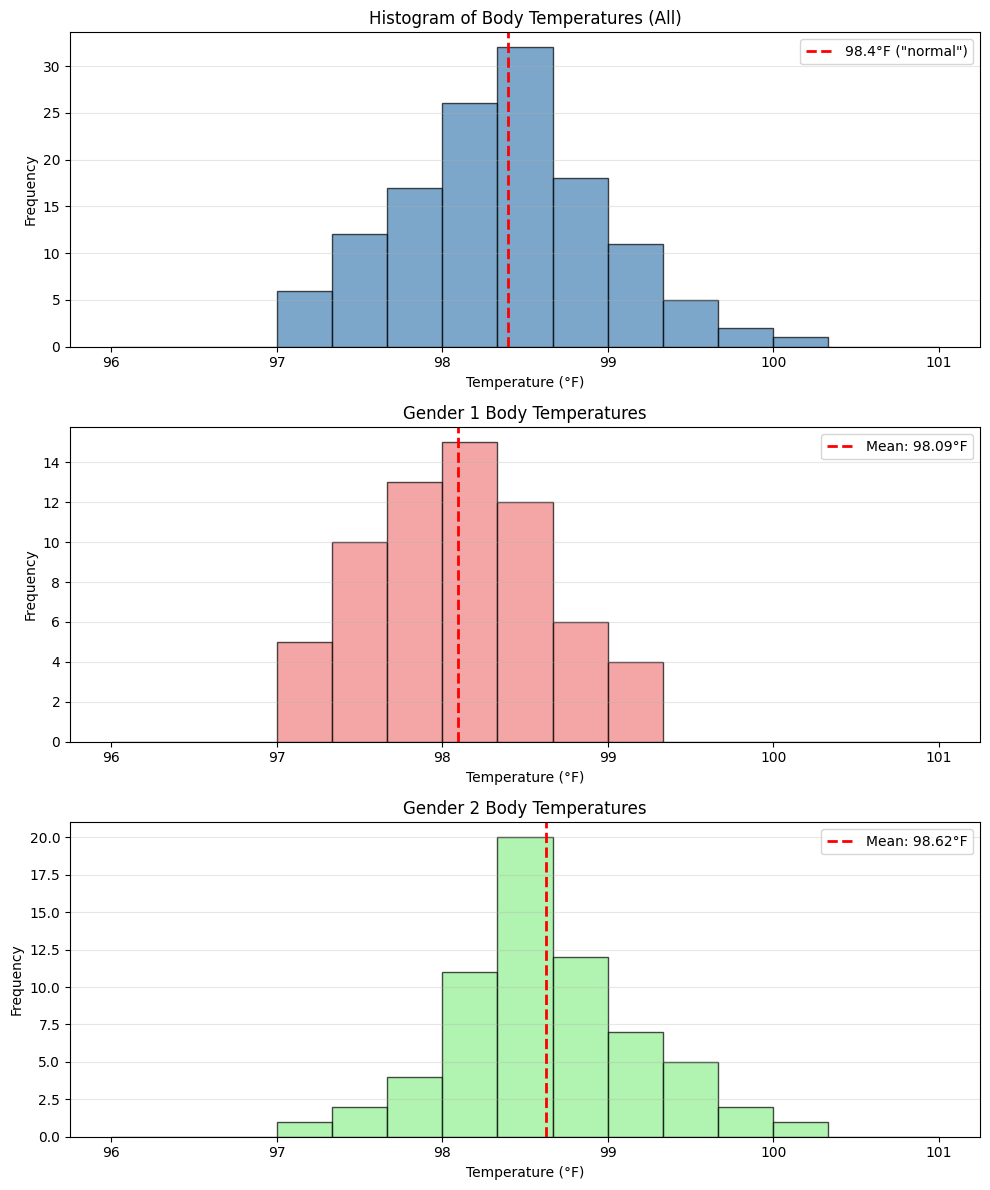

In [8]:
# Simulated body temperature data
np.random.seed(42)
temp_gender1 = np.random.normal(98.2, 0.6, 65)  # Gender 1
temp_gender2 = np.random.normal(98.6, 0.6, 65)  # Gender 2
all_temp = np.concatenate([temp_gender1, temp_gender2])

print(f"Gender 1: Mean = {temp_gender1.mean():.2f}°F, Std = {temp_gender1.std():.2f}°F")
print(f"Gender 2: Mean = {temp_gender2.mean():.2f}°F, Std = {temp_gender2.std():.2f}°F")
print(f"Overall: Mean = {all_temp.mean():.2f}°F, Std = {all_temp.std():.2f}°F")

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Overall histogram
axes[0].hist(all_temp, bins=15, range=(96, 101), 
             color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Temperature (°F)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Body Temperatures (All)')
axes[0].axvline(98.4, color='red', linestyle='--', 
                linewidth=2, label='98.4°F ("normal")')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Gender 1 histogram
axes[1].hist(temp_gender1, bins=15, range=(96, 101), 
             color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Temperature (°F)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Gender 1 Body Temperatures')
axes[1].axvline(temp_gender1.mean(), color='red', 
                linestyle='--', linewidth=2, 
                label=f'Mean: {temp_gender1.mean():.2f}°F')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Gender 2 histogram
axes[2].hist(temp_gender2, bins=15, range=(96, 101), 
             color='lightgreen', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Temperature (°F)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Gender 2 Body Temperatures')
axes[2].axvline(temp_gender2.mean(), color='red', 
                linestyle='--', linewidth=2, 
                label=f'Mean: {temp_gender2.mean():.2f}°F')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

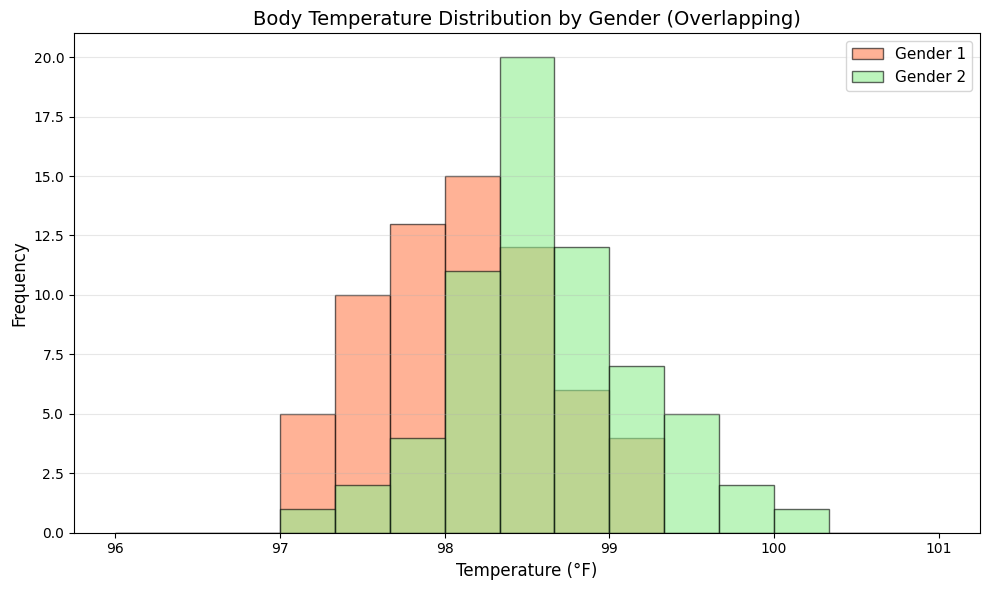

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(temp_gender1, bins=15, range=(96, 101), 
         alpha=0.6, label='Gender 1', color='coral', edgecolor='black')
plt.hist(temp_gender2, bins=15, range=(96, 101), 
         alpha=0.6, label='Gender 2', color='lightgreen', edgecolor='black')
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Body Temperature Distribution by Gender (Overlapping)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()